In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install pmdarima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
df = pd.read_csv('AAP_data.csv')

In [66]:
df

,date,open,high,low,close,volume,Name
0,2013-02-08,78.34,79.7200,78.0100,78.90,1298137,AAP
1,2013-02-11,78.65,78.9100,77.2300,78.39,758016,AAP
2,2013-02-12,78.39,78.6300,77.5132,78.60,876859,AAP
3,2013-02-13,78.90,79.1300,77.8500,78.97,1038574,AAP
4,2013-02-14,78.66,79.7200,78.5850,78.84,1005376,AAP
...,...,...,...,...,...,...,...
1254,2018-02-01,116.24,118.8300,115.8300,117.29,760629,AAP
1255,2018-02-02,115.92,117.1800,113.1250,113.93,1092333,AAP
1256,2018-02-05,113.05,114.9700,109.8100,109.86,1281592,AAP
1257,2018-02-06,108.28,113.1100,106.7450,112.20,1240784,AAP


In [67]:
df.shape

(1259, 7)

In [68]:
df.drop_duplicates()

,date,open,high,low,close,volume,Name
0,2013-02-08,78.34,79.7200,78.0100,78.90,1298137,AAP
1,2013-02-11,78.65,78.9100,77.2300,78.39,758016,AAP
2,2013-02-12,78.39,78.6300,77.5132,78.60,876859,AAP
3,2013-02-13,78.90,79.1300,77.8500,78.97,1038574,AAP
4,2013-02-14,78.66,79.7200,78.5850,78.84,1005376,AAP
...,...,...,...,...,...,...,...
1254,2018-02-01,116.24,118.8300,115.8300,117.29,760629,AAP
1255,2018-02-02,115.92,117.1800,113.1250,113.93,1092333,AAP
1256,2018-02-05,113.05,114.9700,109.8100,109.86,1281592,AAP
1257,2018-02-06,108.28,113.1100,106.7450,112.20,1240784,AAP


In [69]:
df.shape

(1259, 7)

In [70]:
df.isnull().mean() * 100

date      0.0
open      0.0
high      0.0
low       0.0
close     0.0
volume    0.0
Name      0.0
dtype: float64

In [71]:
df = df.drop('Name', axis = 1)

In [72]:
print(df)

            date    open      high       low   close   volume
0     2013-02-08   78.34   79.7200   78.0100   78.90  1298137
1     2013-02-11   78.65   78.9100   77.2300   78.39   758016
2     2013-02-12   78.39   78.6300   77.5132   78.60   876859
3     2013-02-13   78.90   79.1300   77.8500   78.97  1038574
4     2013-02-14   78.66   79.7200   78.5850   78.84  1005376
...          ...     ...       ...       ...     ...      ...
1254  2018-02-01  116.24  118.8300  115.8300  117.29   760629
1255  2018-02-02  115.92  117.1800  113.1250  113.93  1092333
1256  2018-02-05  113.05  114.9700  109.8100  109.86  1281592
1257  2018-02-06  108.28  113.1100  106.7450  112.20  1240784
1258  2018-02-07  112.09  114.5799  109.9000  109.93  2163545

[1259 rows x 6 columns]


In [73]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
df.set_index('date', inplace = True)

<function matplotlib.pyplot.show(close=None, block=None)>

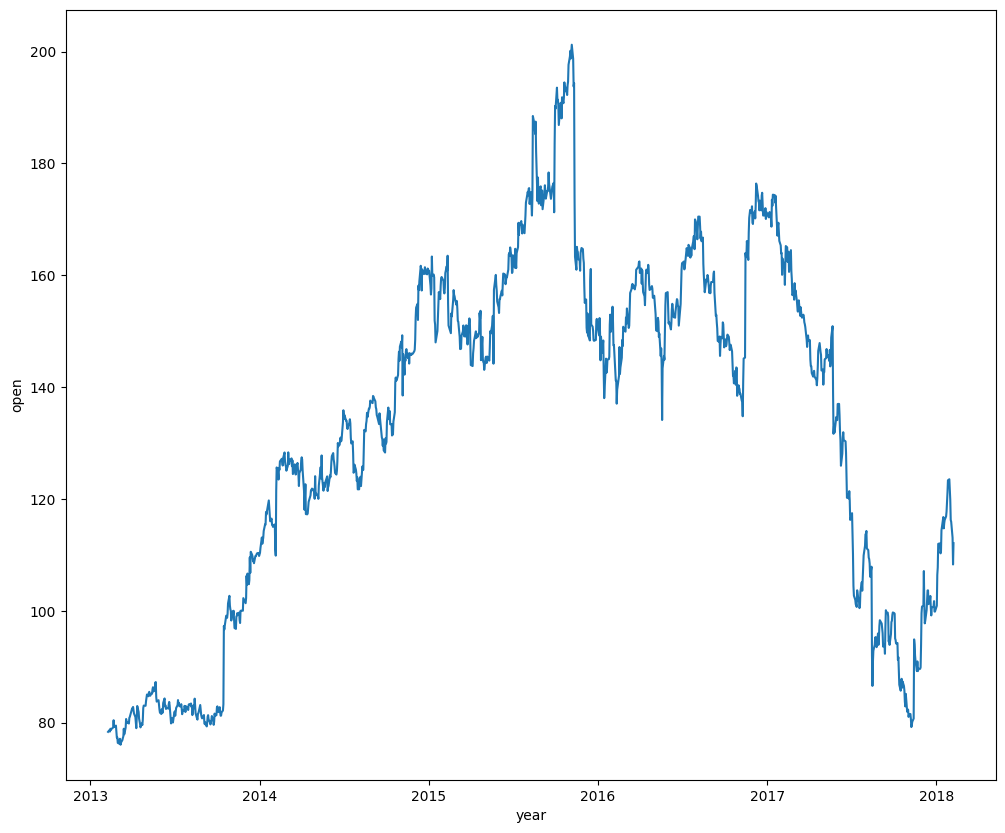

In [74]:
plt.figure(figsize = (12, 10))
plt.plot(df['open'])
plt.xlabel('year')
plt.ylabel('open')
plt.show

In [75]:
model_open = ARIMA(df['open'], order =(0,1,0)).fit()
pred_open = model_open.predict(start="2017-02-08", end="2018-02-07", steps=252)
mae_open = mae(df['open']['2017-02-08':'2018-02-07'], pred_open)
mse_open = mean_squared_error(df['open']['2017-02-08':'2018-02-07'], pred_open)
mape_open = mean_absolute_percentage_error(df['open']['2017-02-08':'2018-02-07'], pred_open)
print(f'MSE: {mse_open} %')
print(f'MAE: {mae_open} %')
print(f'MAPE: {mse_open} %')

MSE: 6.869065079365079 %
MAE: 1.758492063492064 %
MAPE: 6.869065079365079 %


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [98]:
with open('model_open.pickle', 'wb') as f:
    pickle.dump(model_open, f)

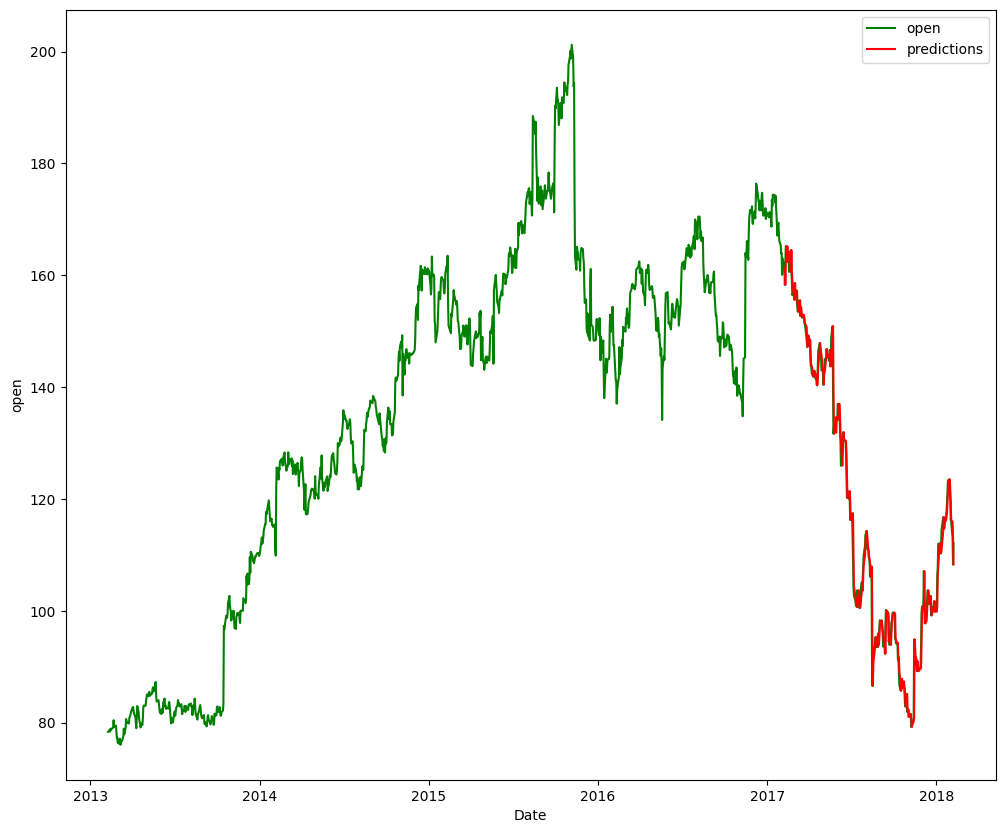

In [76]:
plt.figure(figsize =(12,10))
plt.plot(df['open'], color='green',label = 'open')
plt.plot(pred_open, color = 'red',label = 'predictions')
plt.xlabel("Date") 
plt.ylabel("open")
plt.legend()

<function matplotlib.pyplot.show(close=None, block=None)>

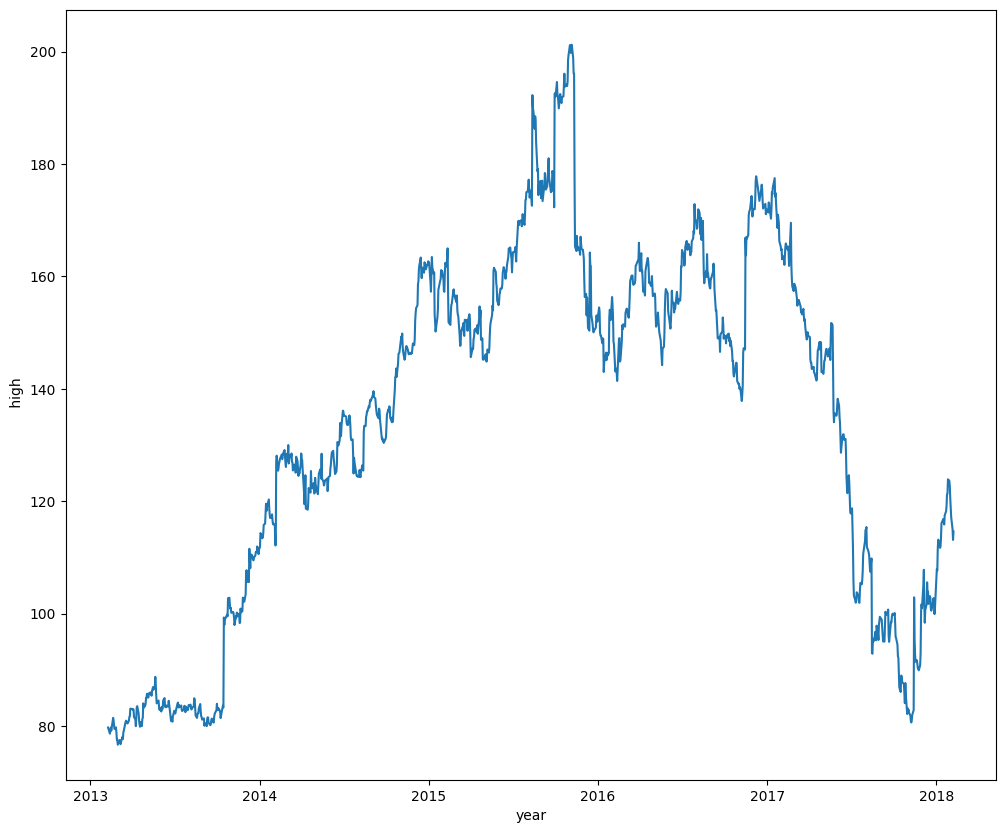

In [77]:
plt.figure(figsize = (12, 10))
plt.plot(df['high'])
plt.xlabel('year')
plt.ylabel(' high')
plt.show

In [78]:
model_high = ARIMA(df['high'], order =(0,1,0)).fit()
pred_high = model_high.predict(start="2017-02-08", end="2018-02-07", steps=252)
mae_high = mae(df['high']['2017-02-08':'2018-02-07'], pred_high)
mse_high = mean_squared_error(df['high']['2017-02-08':'2018-02-07'], pred_high)
mape_high = mean_absolute_percentage_error(df['high']['2017-02-08':'2018-02-07'], pred_high)
print(f'MSE: {mae_high} %')
print(f'MAE: {mse_high} %')
print(f'MAPE: {mape_high} %')

MSE: 1.6130234126984135 %
MAE: 7.257957605198418 %
MAPE: 0.014332084373229869 %


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [99]:
with open('model_high.pickle', 'wb') as f:
    pickle.dump(model_high, f)

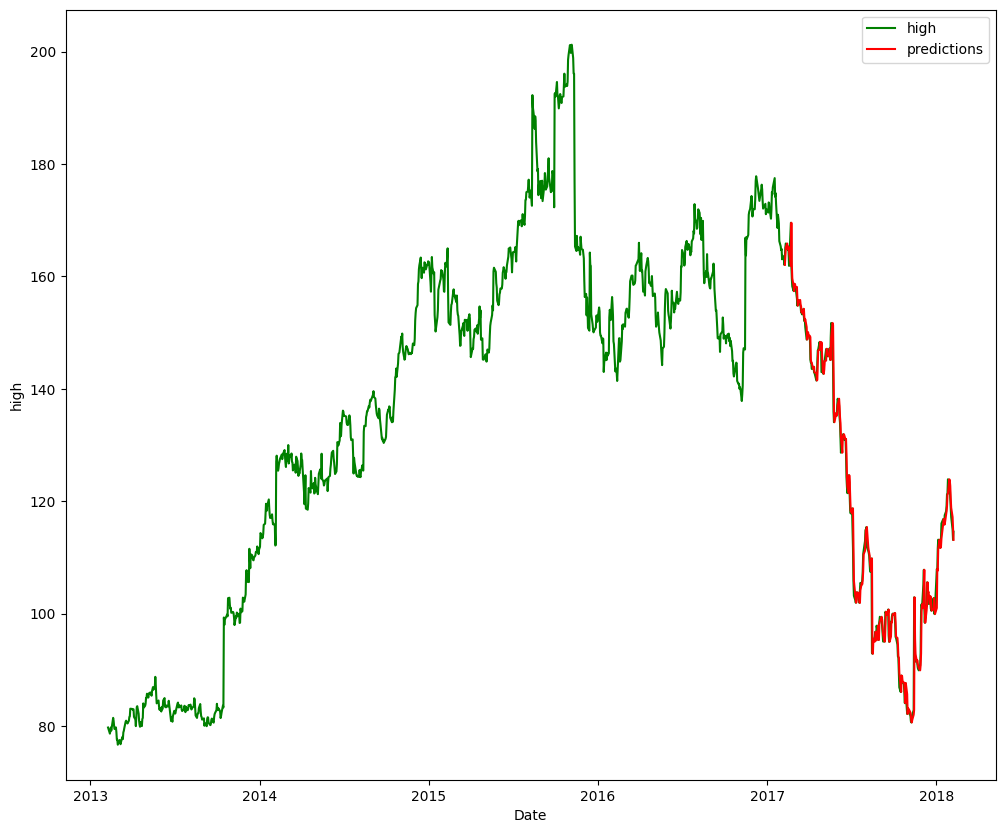

In [79]:
plt.figure(figsize =(12,10))
plt.plot(df['high'], color='green',label = 'high')
plt.plot(pred_high, color = 'red',label = 'predictions')
plt.xlabel("Date") 
plt.ylabel("high")
plt.legend()

<function matplotlib.pyplot.show(close=None, block=None)>

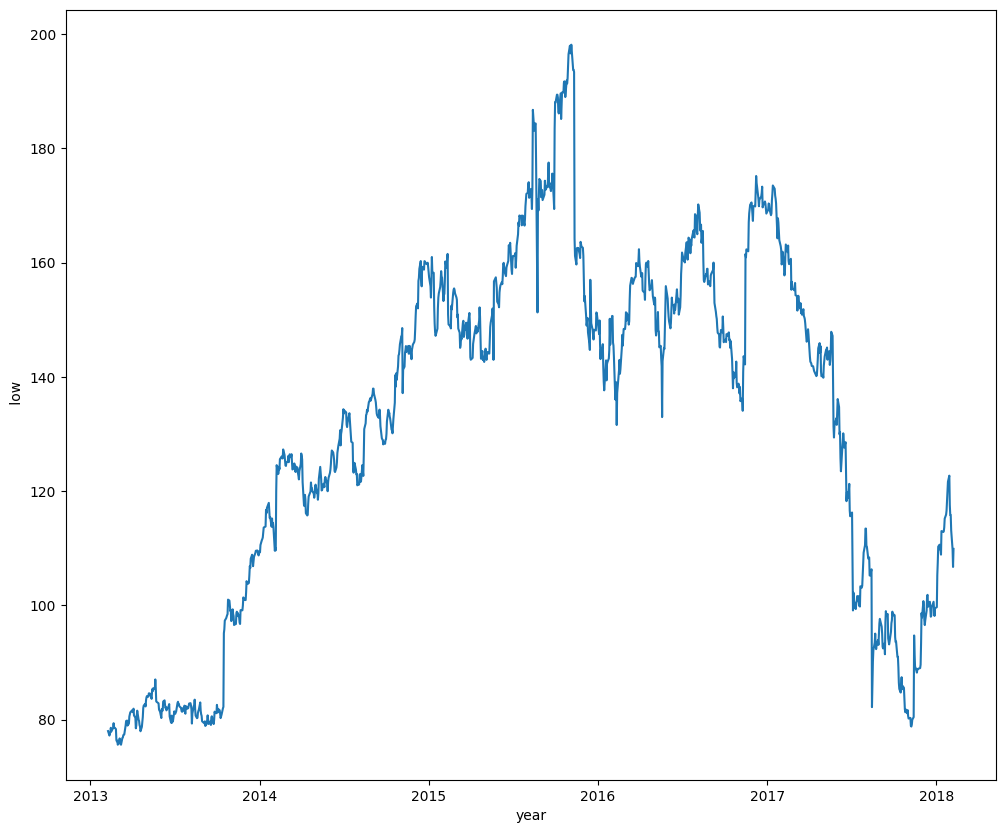

In [80]:
plt.figure(figsize = (12, 10))
plt.plot(df['low'])
plt.xlabel('year')
plt.ylabel(' low')
plt.show

In [81]:
model_low = ARIMA(df['low'], order =(0,1,0)).fit()
pred_low = model_low.predict(start="2017-02-08", end="2018-02-07", steps=252)
mae_low = mae(df['low']['2017-02-08':'2018-02-07'], pred_low)
mse_low = mean_squared_error(df['low']['2017-02-08':'2018-02-07'], pred_low)
mape_low = mean_absolute_percentage_error(df['low']['2017-02-08':'2018-02-07'], pred_low)
print(f'MSE: {mae_low} %')
print(f'MAE: {mse_low} %')
print(f'MAPE: {mape_low} %')

MSE: 1.6520936507936506 %
MAE: 8.239913186904763 %
MAPE: 0.01514974870213267 %


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [100]:
with open('model_low.pickle', 'wb') as f:
    pickle.dump(model_low, f)

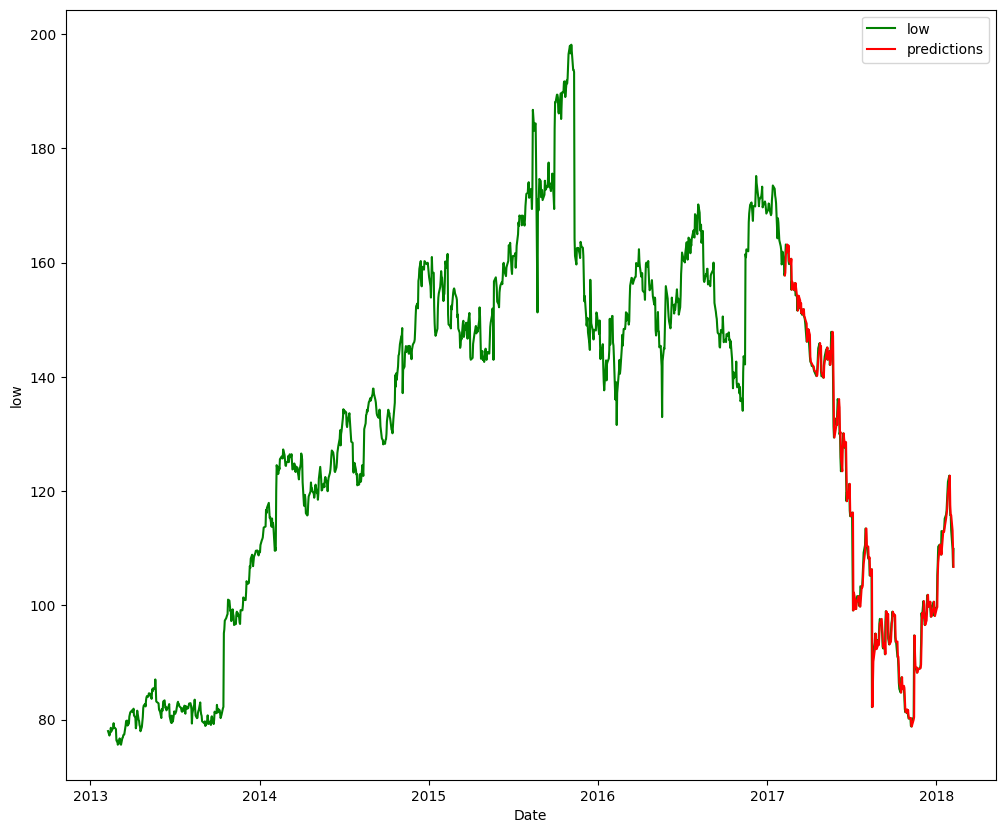

In [82]:
plt.figure(figsize =(12,10))
plt.plot(df['low'], color='green',label = 'low')
plt.plot(pred_low, color = 'red',label = 'predictions')
plt.xlabel("Date") 
plt.ylabel("low")
plt.legend()

<function matplotlib.pyplot.show(close=None, block=None)>

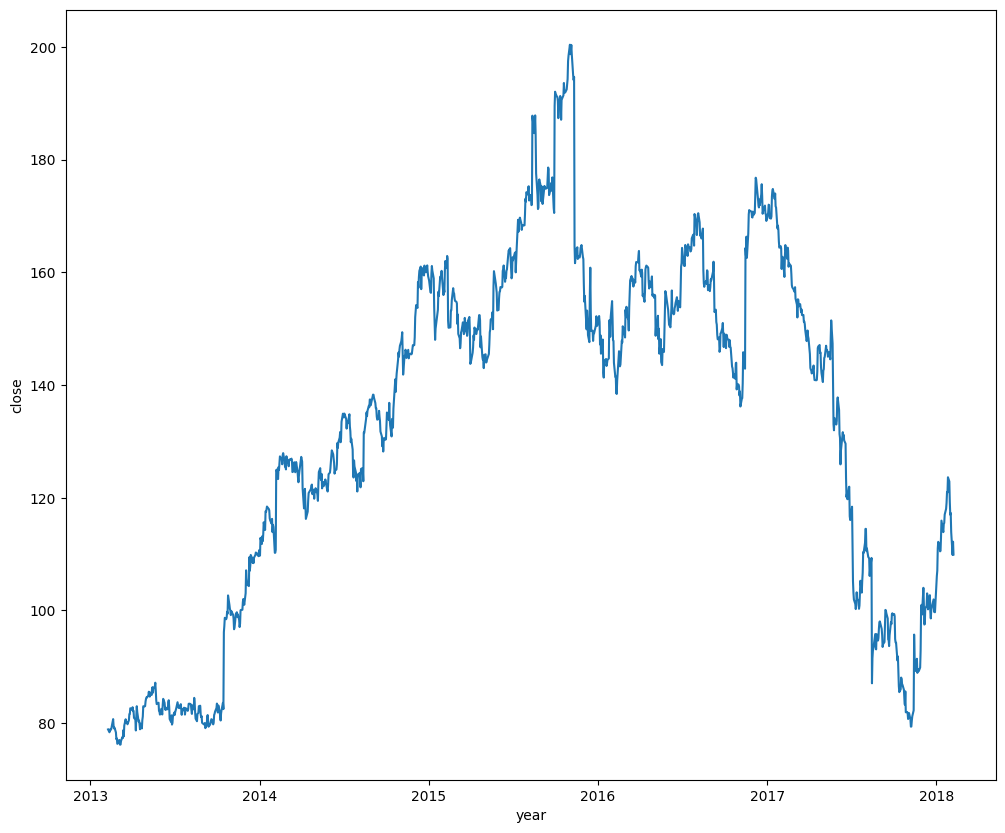

In [83]:
plt.figure(figsize = (12, 10))
plt.plot(df['close'])
plt.xlabel('year')
plt.ylabel('close')
plt.show

In [84]:
model_close = ARIMA(df['close'], order =(0,1,0)).fit()
pred_close = model_close.predict(start="2017-02-08", end="2018-02-07", steps=252)
mae_close = mae(df['close']['2017-02-08':'2018-02-07'], pred_close)
mse_close = mean_squared_error(df['close']['2017-02-08':'2018-02-07'], pred_close)
mape_close = mean_absolute_percentage_error(df['close']['2017-02-08':'2018-02-07'], pred_close)
print(f'MSE: {mae_close} %')
print(f'MAE: {mse_close} %')
print(f'MAPE: {mape_close} %')

MSE: 1.7074206349206347 %
MAE: 1.7074206349206347 %
MAPE: 1.7074206349206347 %


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [101]:
with open('model_close.pickle', 'wb') as f:
    pickle.dump(model_close, f)

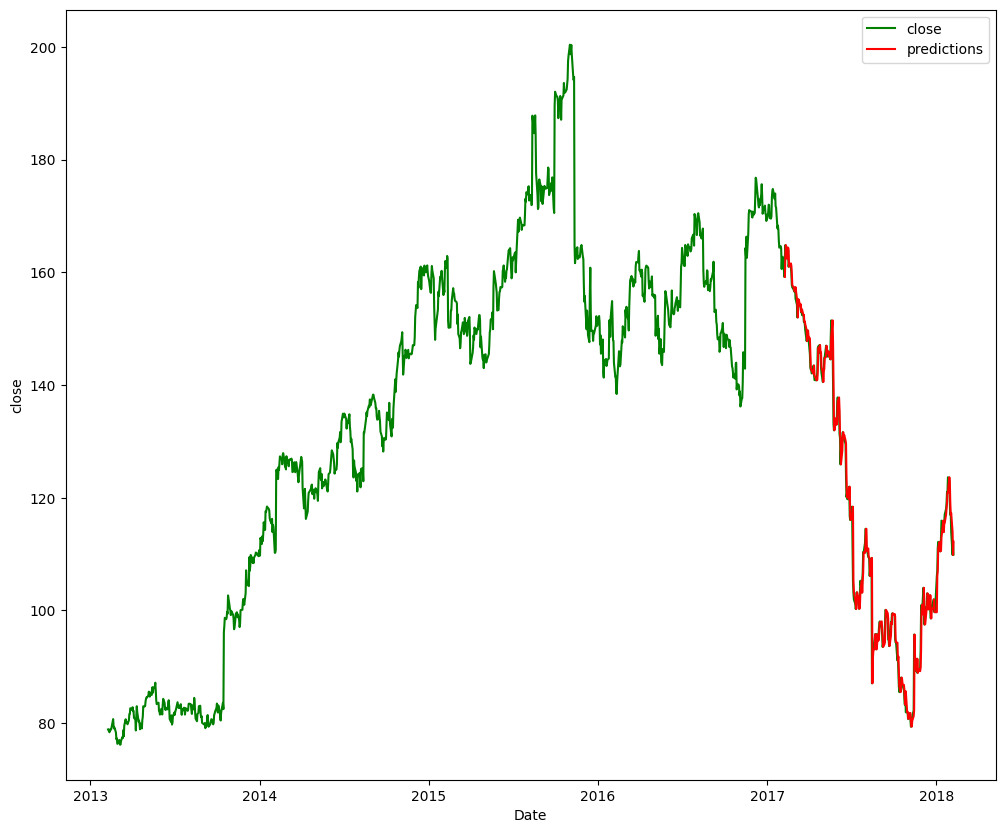

In [85]:
plt.figure(figsize =(12,10))
plt.plot(df['close'], color='green',label = 'close')
plt.plot(pred_close, color = 'red',label = 'predictions')
plt.xlabel("Date") 
plt.ylabel("close")
plt.legend()

Text(0, 0.5, 'volume')

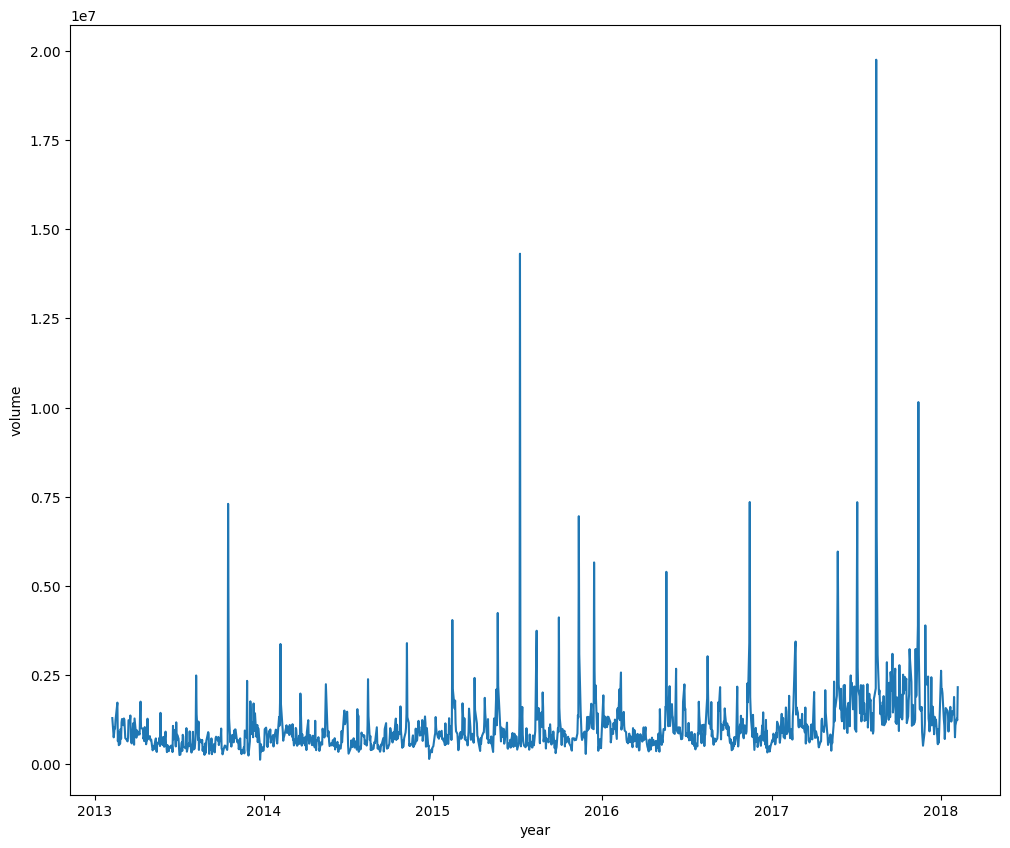

In [86]:
plt.figure(figsize = (12, 10))
plt.plot(df['volume'])
plt.xlabel('year')
plt.ylabel('volume')

In [93]:
q1 = df['volume'].quantile(0.25)
q3 = df['volume'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

median = df['volume'].median()
df.loc[df['volume'] < lower_bound, 'volume'] = median
df.loc[df['volume'] > upper_bound, 'volume'] = median

In [95]:
model_volume = ARIMA(df['volume'], order =(0,1,0)).fit()
pred_volume = model_volume.predict(start="2017-02-08", end="2018-02-07", steps=252)
mae_volume = mae(df['volume']['2017-02-08':'2018-02-07'], pred_volume)
mse_volume = mean_squared_error(df['volume']['2017-02-08':'2018-02-07'], pred_volume)
mape_volume = mean_absolute_percentage_error(df['volume']['2017-02-08':'2018-02-07'], pred_volume)
print(f'MSE: {mae_volume} %')
print(f'MAE: {mse_volume} %')
print(f'MAPE: {mape_volume} %')

MSE: 389118.7896825397 %
MAE: 273183690342.82938 %
MAPE: 0.3415778105463587 %


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [102]:
with open('model_volume.pickle', 'wb') as f:
    pickle.dump(model_volume, f)

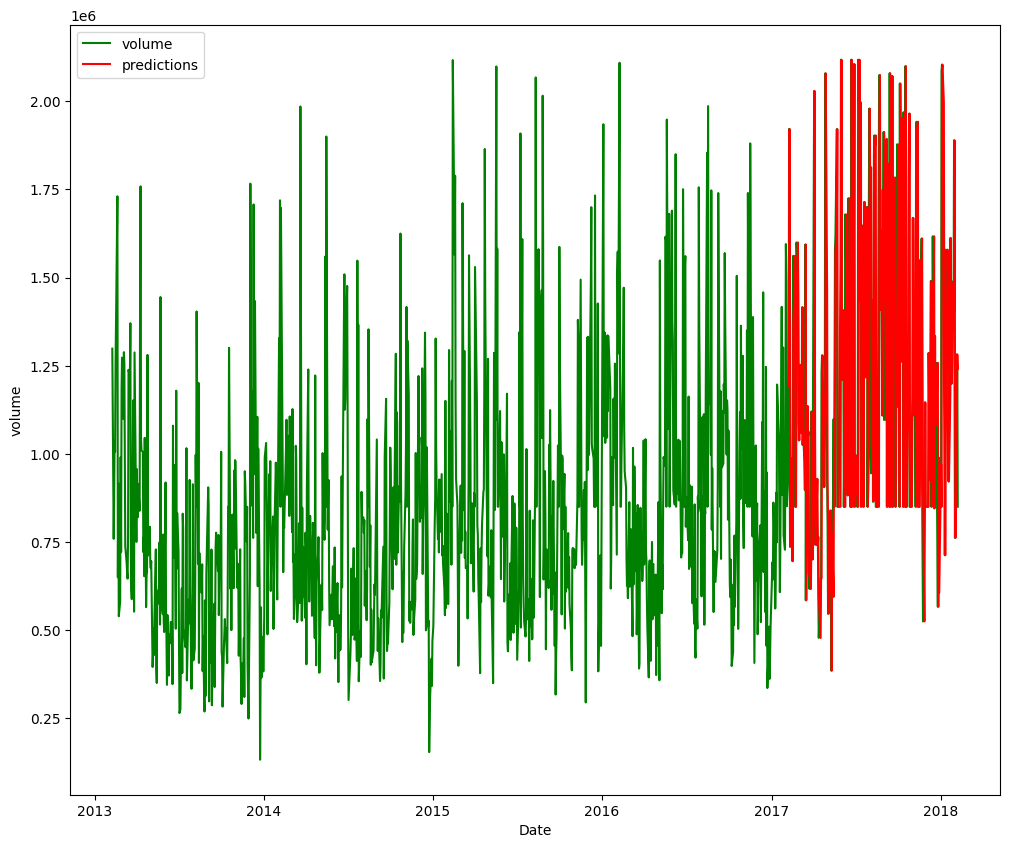

In [96]:
plt.figure(figsize =(12,10))
plt.plot(df['volume'], color='green',label = 'volume')
plt.plot(pred_volume, color = 'red',label = 'predictions')
plt.xlabel("Date") 
plt.ylabel("volume")
plt.legend()

In [87]:
# df.describe()

In [88]:
# q1, q3 = np.percentile(df['volume'], [25, 75])


# IQR = q3 - q1

# lower_bound = q1 - 1.5 * IQR
# upper_bound = q3 + 1.5 * IQR


# outliers = [val for val in df['volume'] if val < lower_bound or val > upper_bound]

In [89]:
# len(outliers)

In [90]:
# list = []
# list.append(df.loc[df['volume'] < lower_bound, 'volume'])
# list.append(df.loc[df['volume'] > upper_bound, 'volume'])
# for s in list:
#     index = s.index

In [91]:
# len(index)

In [92]:
# df['week'] = df.index.strftime('%U')

# median_values = df.groupby('week')['volume'].median()
# df['median'] = df['week'].map(median_values)

# for date in index:
#     week_number = pd.to_datetime(date).strftime('%U')
#     median_value = median_values.loc[week_number]
#     df['volume'].loc[date] = median_value